 # **<center>Insurance charges predictions using Decision Trees**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## **1. Reading data**

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.drop(['id'], axis=1, inplace=True)

## **2. Convert data into appropriate types**

In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### **Based on data description...**
### **Categorical attributes** = sex, smoker, region
### **Numerical attriburtes** = age, bmi, children _(note - you can consider children as categorical as well)_
### **Target** = charge **_(continuous)_**

In [5]:
## Manually specifying categorical columns
cat_attributes = ['sex','smoker','region']

## Alternative - Automated
## Consider all object data-types as categorical
cat_attributes = insurance.dtypes[insurance.dtypes=='object'].index

## Numeric Data
num_attributes = insurance.columns.difference(cat_attributes)

In [6]:
## Single line code to convert all the variables into categorical
insurance[cat_attributes] = insurance[cat_attributes].apply(lambda x: x.astype('category'))
## Print data-types
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## **3. Summary statistics**

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **4. Understanding target distribution**

/home/sagar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


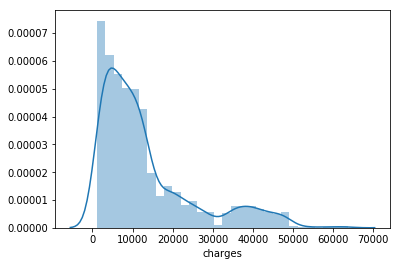

In [8]:
## For continuous target
sns.distplot(insurance['charges'])

**Important Take-Away** - *Transformations should be applied in a 2-phase strategy*

## **5. Decouple traget from the features**

In [9]:
X = insurance[insurance.columns.difference(['charges'])]  ## Select all columns except "Target"
y = insurance['charges']

## **6. Test-Train split**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6842)

In [103]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (936, 6)
y_train (936,)
X_test (402, 6)
y_test (402,)


## **7. Check missing values**

In [104]:
print(X_train.isnull().sum(axis=0))
print(X_test.isnull().sum(axis=0))

age         0
bmi         0
children    0
region      3
sex         0
smoker      5
dtype: int64
age          0
bmi          0
children     0
region       2
sex          0
smoker      12
dtype: int64


### **Imputing Categorical Missing Values**
**Notice - The missing values are categorical in nature. Hence the standard way of using Imputer is not possible.**

In [105]:
## Learning mode from train data
mode = X_train.mode().iloc[0]
print(mode)

age                19
bmi            30.495
children            0
region      southeast
sex              male
smoker             no
Name: 0, dtype: object


In [106]:
## Imputing train data
X_train.fillna(mode, inplace=True)
## Imputing test data
X_test.fillna(mode, inplace=True)

/home/sagar/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [107]:
## Testing pursposes
# X_test = X_test.loc[X_test['region']!='northwest',:]
# X_test.region = X_test.region.astype('str').astype('category')
# X_test.region.value_counts()

## **8. Dummifying - One hot encoding categorical columns**

In [110]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [112]:
X_train.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
938,18,26.180,2,0,0,1,0,0,1,1,0
607,59,23.655,0,0,1,0,0,1,0,0,1
1197,41,33.550,0,0,0,1,0,0,1,1,0
249,29,28.975,1,1,0,0,0,0,1,1,0
601,51,31.635,0,0,1,0,0,0,1,1,0


In [113]:
X_test.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
92,59,29.830,3,1,0,0,0,0,1,0,1
779,53,28.880,0,0,1,0,0,0,1,1,0
599,52,37.525,2,0,1,0,0,1,0,1,0
106,19,28.400,1,0,0,0,1,1,0,1,0
1261,28,37.100,1,0,0,0,1,0,1,1,0


# Done with preprocessing !!

# <center>**Regression Trees**

In [114]:
X_train.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
938,18,26.180,2,0,0,1,0,0,1,1,0
607,59,23.655,0,0,1,0,0,1,0,0,1
1197,41,33.550,0,0,0,1,0,0,1,1,0
249,29,28.975,1,1,0,0,0,0,1,1,0
601,51,31.635,0,0,1,0,0,0,1,1,0


### Model 1 - default parameters

In [117]:
from sklearn import tree
dt1_gini = tree.DecisionTreeRegressor()   ## Instantiating DecisionTree-Classifier
dt1_gini.fit(X_train, y_train)             ## Training Model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Checking R-square

In [122]:
print('Train Accuracy =',dt1_gini.score(X_train, y_train))
print('Test Accuracy =',dt1_gini.score(X_test, y_test))

Train Accuracy = 0.9986541245516698
Test Accuracy = 0.6396907551001254


### Plotting the decision tree

In [121]:
import graphviz
dot_data = tree.export_graphviz(dt1_gini, out_file=None, feature_names=X_train.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt1_gini") 

'dt1_gini.pdf'

### Any observations in the previous model? 

### Model 2
**Max tree depth = 5**

In [125]:
dt2_entropy = tree.DecisionTreeRegressor(max_depth =5)
dt2_entropy.fit(X_train, y_train)
print('Train Accuracy =',dt2_entropy.score(X_train, y_train))
print('Test Accuracy =',dt2_entropy.score(X_test, y_test))

Train Accuracy = 0.8703487063583268
Test Accuracy = 0.8004666877460566


In [127]:
dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X_train.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_maxdept5") 

'dt2_maxdept5.pdf'

### Model 3
**Minimum weight fraction at leaf node = 0.05**

In [142]:
dt3_fraction15 = tree.DecisionTreeRegressor(min_weight_fraction_leaf=0.05)
dt3_fraction15.fit(X_train, y_train)
print('Train Accuracy =',dt3_fraction15.score(X_train, y_train))
print('Test Accuracy =',dt3_fraction15.score(X_test, y_test))

Train Accuracy = 0.848040863921449
Test Accuracy = 0.8166857160409853


In [144]:
dot_data = tree.export_graphviz(dt3_fraction15, out_file=None,feature_names=X_train.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt3_fraction005")

'dt3_fraction005.pdf'

### Which model/parameters to choose for best accuracy?
### Will the model be really stable?

## Randomized Hyper-parameter search with cross-validation

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt = tree.DecisionTreeRegressor() 
param_grid = {'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(0.001,0.1,0.001),
             'max_depth':np.arange(5,50,1),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print('Test Accuracy',rsearch.score(X_test, y_test))

0.8356068293444204
DecisionTreeRegressor(criterion='mse', max_depth=49, max_features=None,
           max_leaf_nodes=25, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=0.081, min_weight_fraction_leaf=0.045,
           presort=False, random_state=None, splitter='best')
Test Accuracy 0.8234195955899052


### Making predictions

In [150]:
predicted= pd.DataFrame(rsearch.predict(X_train))
insurance['predictions'] = predicted
insurance.to_csv("insurance_predictions.csv")